# KITTI: Semantic Dataset
Download dataset from [http://www.cvlibs.net/datasets/kitti/eval_semantics.php](http://www.cvlibs.net/datasets/kitti/eval_semantics.php). Both "**pixel-level semantic segmentation**" and "**instance-level semantic segmentation**" actually go to the same dataset, but it has different images for each type of task. Here is the direct link: [https://s3.eu-central-1.amazonaws.com/avg-kitti/data_semantics.zip](https://s3.eu-central-1.amazonaws.com/avg-kitti/data_semantics.zip)
In addition, downloading provided [development kit](https://s3.eu-central-1.amazonaws.com/avg-kitti/devkit_semantics.zip) would be very helpful to understand the dataset.

The dataset contains the following folders:
- **image_2**: 3-channel(RGB) uint8 8-bit PNG input image
- **semantic**: a single channel uint8 8-bit PNG image with each pixel value representing its semantic label ID
- **instance**: a single channel uint16 16-bit PNG image where the lower 8 bits of each pixel value are its instance ID, while the higher 8 bits of each pixel value are its semantic labels ID. Instance IDs start from 1 for each semantic class (ex. car:1,2,3 ... etc. - building:1,2,3 ... etc.). Instance ID value of 0 means no instance ground truth is available and should be ignored for instance segmentation.
- **semantic_rgb**:

<details>
    <summary>Click to see labels</summary>

    | name                   | id  | trainId | category       | catId | hasInstances | ignoreInEval | color         |
    |------------------------|-----|---------|----------------|-------|--------------|--------------|---------------|
    | 'unlabeled'            | 0   | 255     | 'void'         | 0     | False        | True         | (  0,  0,  0) |
    | 'ego vehicle'          | 1   | 255     | 'void'         | 0     | False        | True         | (  0,  0,  0) |
    | 'rectification border' | 2   | 255     | 'void'         | 0     | False        | True         | (  0,  0,  0) |
    | 'out of roi'           | 3   | 255     | 'void'         | 0     | False        | True         | (  0,  0,  0) |
    | 'static'               | 4   | 255     | 'void'         | 0     | False        | True         | (  0,  0,  0) |
    | 'dynamic'              | 5   | 255     | 'void'         | 0     | False        | True         | (111, 74,  0) |
    | 'ground'               | 6   | 255     | 'void'         | 0     | False        | True         | ( 81,  0, 81) |
    | 'road'                 | 7   | 0       | 'flat'         | 1     | False        | False        | (128, 64,128) |
    | 'sidewalk'             | 8   | 1       | 'flat'         | 1     | False        | False        | (244, 35,232) |
    | 'parking'              | 9   | 255     | 'flat'         | 1     | False        | True         | (250,170,160) |
    | 'rail track'           | 10  | 255     | 'flat'         | 1     | False        | True         | (230,150,140) |
    | 'building'             | 11  | 2       | 'construction' | 2     | False        | False        | ( 70, 70, 70) |
    | 'wall'                 | 12  | 3       | 'construction' | 2     | False        | False        | (102,102,156) |
    | 'fence'                | 13  | 4       | 'construction' | 2     | False        | False        | (190,153,153) |
    | 'guard rail'           | 14  | 255     | 'construction' | 2     | False        | True         | (180,165,180) |
    | 'bridge'               | 15  | 255     | 'construction' | 2     | False        | True         | (150,100,100) |
    | 'tunnel'               | 16  | 255     | 'construction' | 2     | False        | True         | (150,120, 90) |
    | 'pole'                 | 17  | 5       | 'object'       | 3     | False        | False        | (153,153,153) |
    | 'polegroup'            | 18  | 255     | 'object'       | 3     | False        | True         | (153,153,153) |
    | 'traffic light'        | 19  | 6       | 'object'       | 3     | False        | False        | (250,170, 30) |
    | 'traffic sign'         | 20  | 7       | 'object'       | 3     | False        | False        | (220,220,  0) |
    | 'vegetation'           | 21  | 8       | 'nature'       | 4     | False        | False        | (107,142, 35) |
    | 'terrain'              | 22  | 9       | 'nature'       | 4     | False        | False        | (152,251,152) |
    | 'sky'                  | 23  | 10      | 'sky'          | 5     | False        | False        | ( 70,130,180) |
    | 'person'               | 24  | 11      | 'human'        | 6     | True         | False        | (220, 20, 60) |
    | 'rider'                | 25  | 12      | 'human'        | 6     | True         | False        | (255,  0,  0) |
    | 'car'                  | 26  | 13      | 'vehicle'      | 7     | True         | False        | (  0,  0,142) |
    | 'truck'                | 27  | 14      | 'vehicle'      | 7     | True         | False        | (  0,  0, 70) |
    | 'bus'                  | 28  | 15      | 'vehicle'      | 7     | True         | False        | (  0, 60,100) |
    | 'caravan'              | 29  | 255     | 'vehicle'      | 7     | True         | True         | (  0,  0, 90) |
    | 'trailer'              | 30  | 255     | 'vehicle'      | 7     | True         | True         | (  0,  0,110) |
    | 'train'                | 31  | 16      | 'vehicle'      | 7     | True         | False        | (  0, 80,100) |
    | 'motorcycle'           | 32  | 17      | 'vehicle'      | 7     | True         | False        | (  0,  0,230) |
    | 'bicycle'              | 33  | 18      | 'vehicle'      | 7     | True         | False        | (119, 11, 32) |
    | 'license plate'        | -1  | -1      | 'vehicle'      | 7     | False        | True         | (  0,  0,142) |
</details>

In [14]:
from PIL import Image
import numpy as np
import scipy.misc as sp

from IPython.display import display

DATASET = "../../dataset/kitti_data_semantics"
EXAMPLE_FRAME = "000129_10"

## Analyze Dataset

### Input

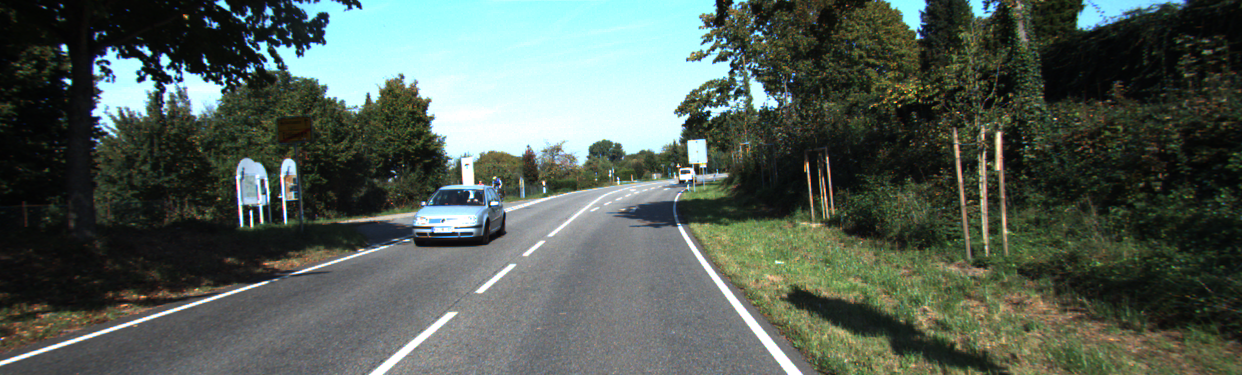

In [27]:
image = Image.open(f'{DATASET}/training/image_2/{EXAMPLE_FRAME}.png')
image_np = np.asarray(image)
display(image)

### Semantic Mask

(375, 1242)
[ 4  7 17 18 20 21 22 23 24 25 26 33]


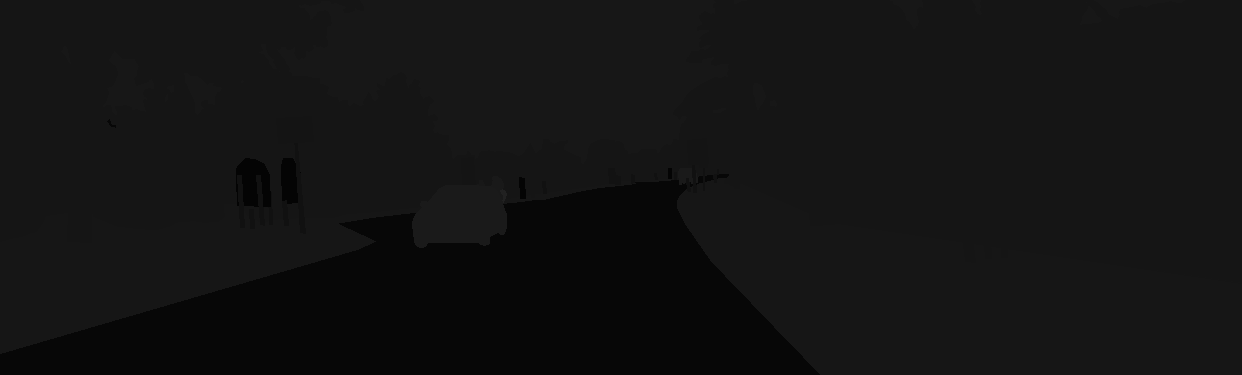

In [21]:
mask_semantic = Image.open(f'{DATASET}/training/semantic/{EXAMPLE_FRAME}.png')
mask_semantic_np = np.asarray(mask_semantic)
print(np.asarray(mask_semantic).shape)
print(np.unique(np.asarray(mask_semantic)))
display(mask_semantic)

### Semantic RGB Mask

(375, 1242, 3)
[  0  11  20  32  35  60  64  70 107 119 128 130 142 152 153 180 220 251
 255]


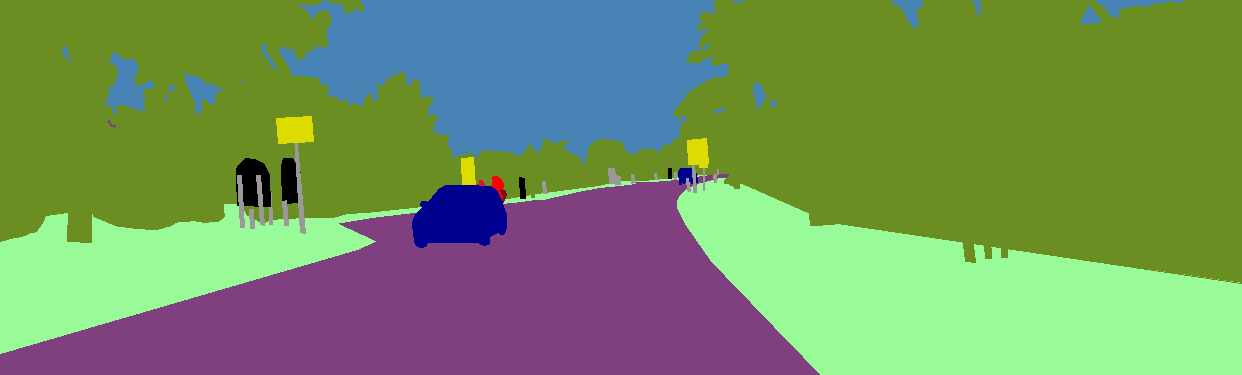

In [22]:
mask_semantic_rgb = Image.open(f'{DATASET}/training/semantic_rgb/{EXAMPLE_FRAME}.png')
mask_semantic_rgb_np = np.asarray(mask_semantic_rgb)
print(np.asarray(mask_semantic_rgb).shape)
print(np.unique(np.asarray(mask_semantic_rgb)))
display(mask_semantic_rgb)

### Instance Mask

shape:(375, 1242)
unique pixel values:[1024 1792 4352 4608 5120 5376 5632 5888 6145 6401 6657 6658 8449]
unique semantic labels(first 8bits):[ 4  7 17 18 20 21 22 23 24 25 26 33]
unique instance numbers per label(last 8bits):[0 1 2]


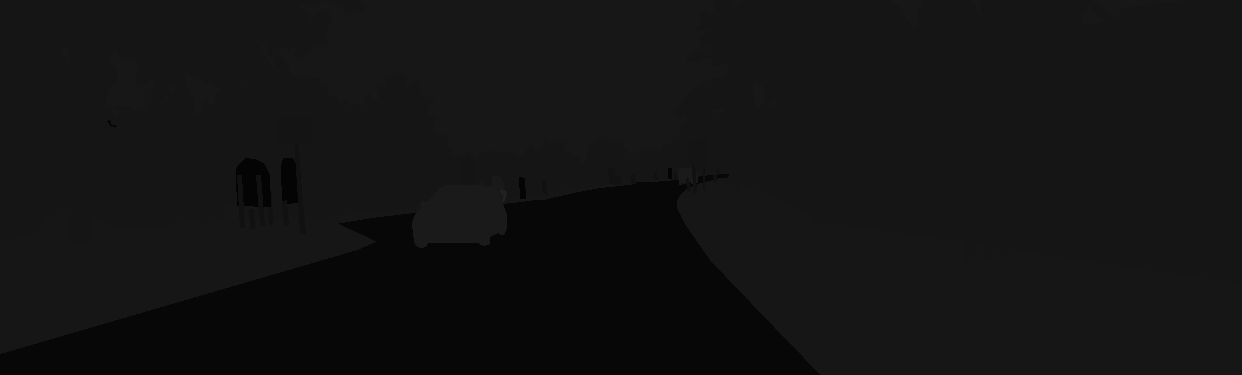

In [23]:
mask_instance = Image.open(f'{DATASET}/training/instance/{EXAMPLE_FRAME}.png')
mask_instance_np = np.asarray(mask_instance)
print(f"shape:{np.asarray(mask_instance).shape}")
print(f"unique pixel values:{np.unique(np.asarray(mask_instance))}")
print(f"unique semantic labels(first 8bits):{np.unique(np.asarray(mask_instance)//256)}")
print(f"unique instance numbers per label(last 8bits):{np.unique(np.asarray(mask_instance)%256)}")
display(mask_instance)

## Using Mask

In [ ]:
# Make transparent
def make_transparent(pil_image, color_to_be_transparent=(0,0,0)):
    img = pil_image.copy().convert("RGBA")
    datas = img.getdata()

    transparent_image = []
    for p in datas:
        if p[0:3] == color_to_be_transparent:
            transparent_image.append((*p[0:3], 0))
        else:
            transparent_image.append(p)
    img.putdata(transparent_image)
    return img

### Using Semantic Mask

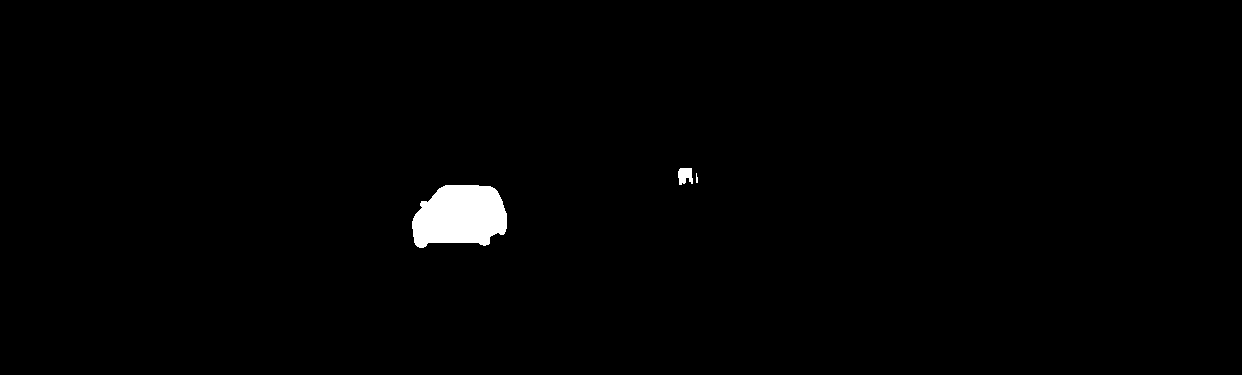

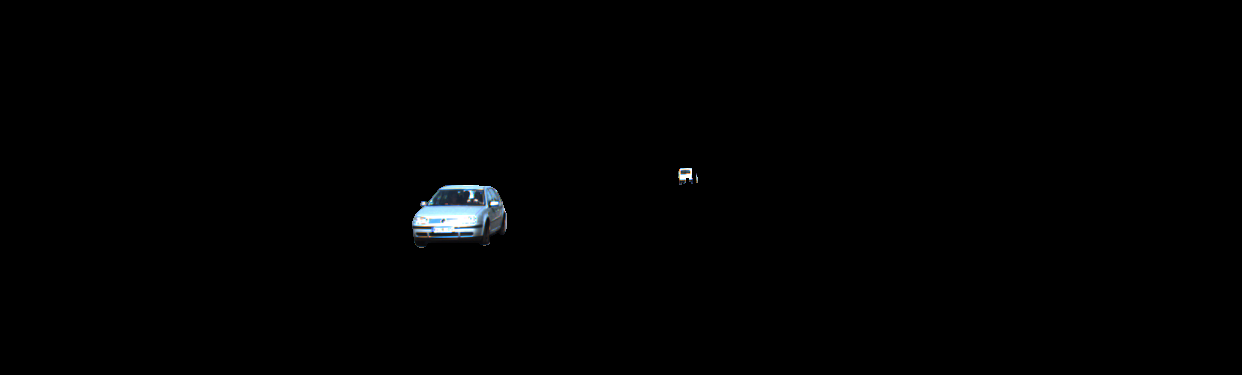

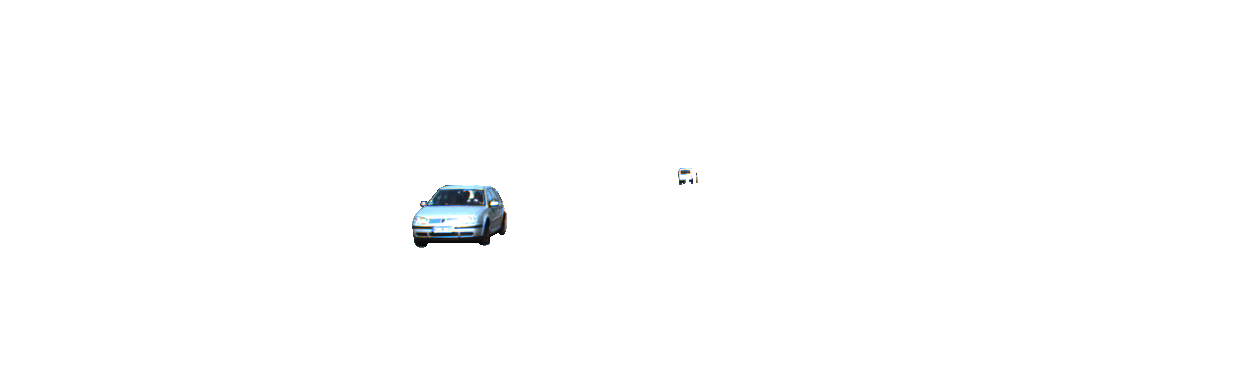

In [55]:
# Convert 2D mask to 3D to be used with RGB image
mask_semantic_3d = mask_semantic_np.reshape((mask_semantic_np.shape[0], mask_semantic_np.shape[1], 1))
semantic_label_car = 26

# Create mask for car
mask_car = np.where(mask_semantic_3d != semantic_label_car, image_np*0,np.ones_like(image_np)*255)
display(Image.fromarray(mask_car))

# Cut masked area
masked_cars = Image.fromarray(np.zeros_like(image_np))
masked_cars.paste(image, (0, 0), Image.fromarray(mask_car).convert('L'))
display(masked_cars)


# Make transparent
display(make_transparent(masked_cars, (0,0,0)))

### Using Instance Mask

Car mask for instance#1:


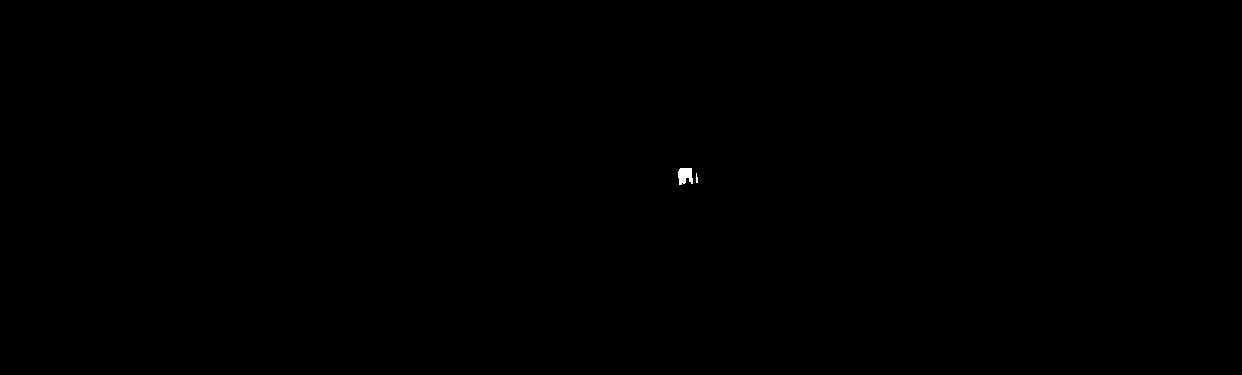

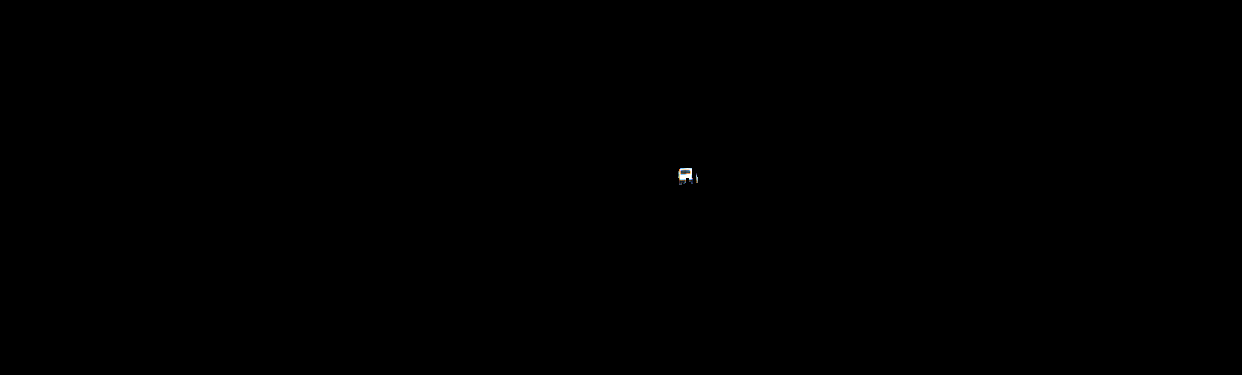

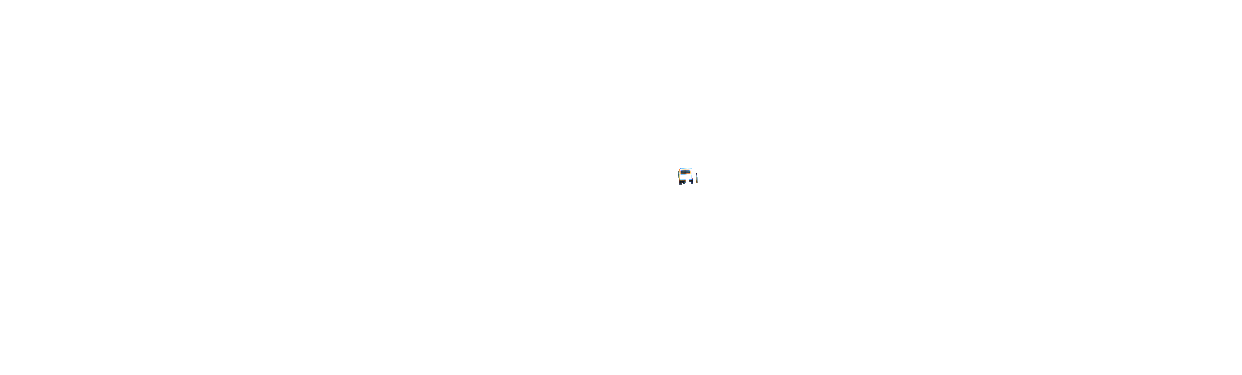

Car mask for instance#2:


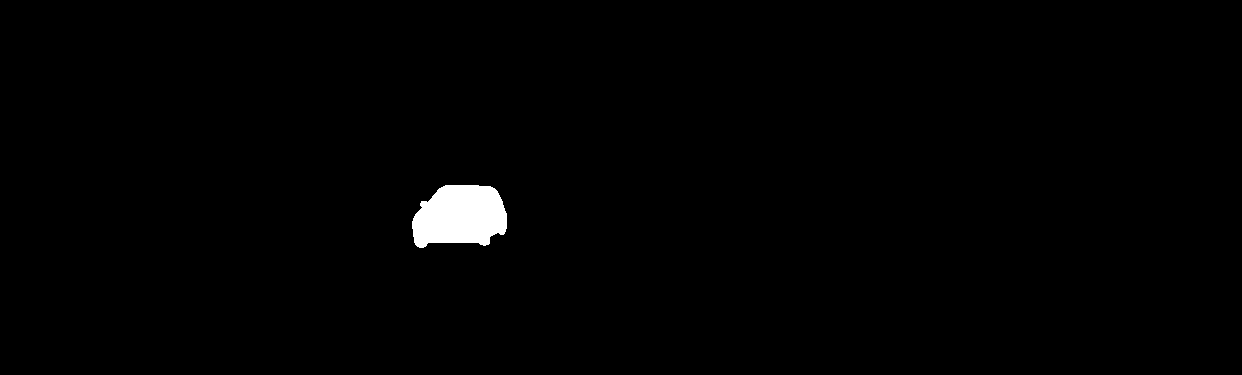

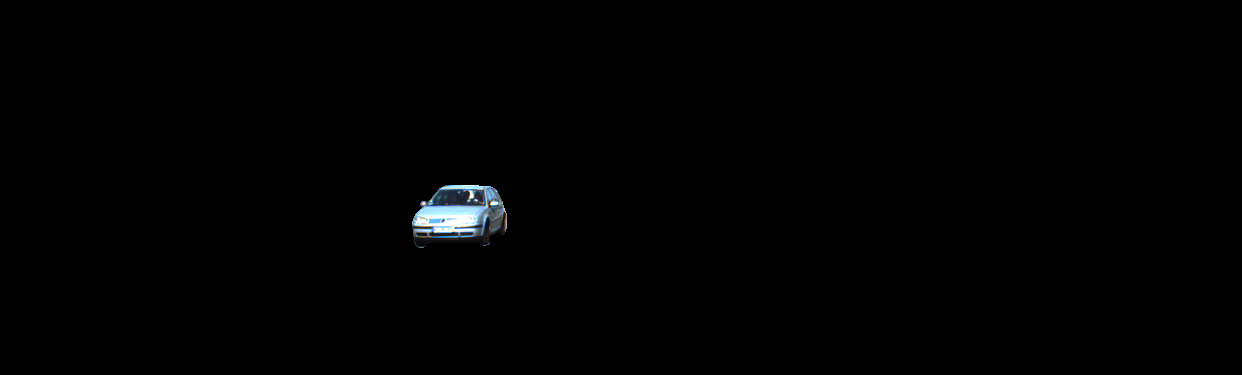

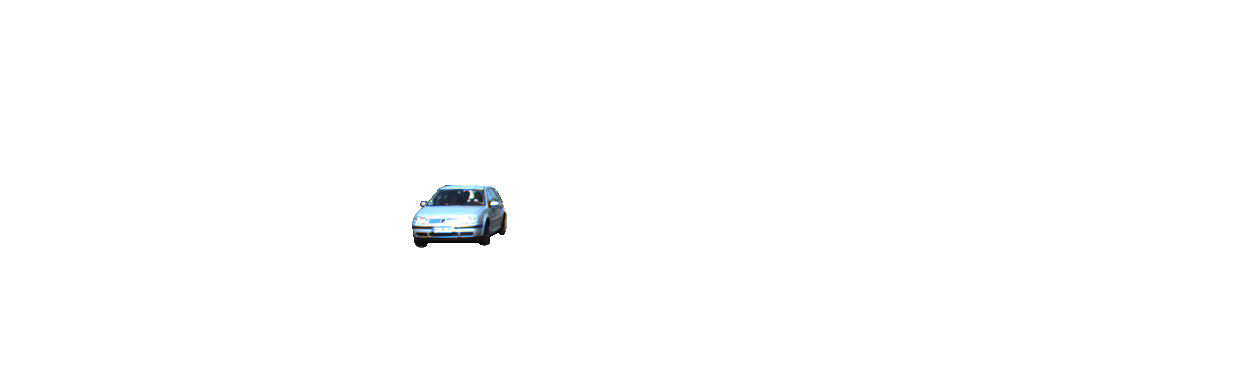

In [59]:
# Convert 2D mask to 3D to be used with RGB image
mask_instance_np_3d = mask_instance_np.reshape((mask_instance_np.shape[0], mask_instance_np.shape[1], 1))
semantic_label_car = 26
max_instance_count = 20 # maximum number of instance to search
unique_instance_values = np.unique(mask_instance_np_3d)

for i in range(1,max_instance_count+1):
    instance_value = semantic_label_car*256 + i # First 8bits represent label, remaining bits represent instance number

    # Skip instances are not car
    if instance_value not in unique_instance_values:
        continue

    # Create mask for car
    print(f"Car mask for instance#{i}:")
    mask_car = np.where(mask_instance_np_3d != instance_value, image_np*0,np.ones_like(image_np)*255)
    display(Image.fromarray(mask_car))

    # Cut masked area
    masked_car = Image.fromarray(np.zeros_like(image_np))
    masked_car.paste(image, (0, 0), Image.fromarray(mask_car).convert('L'))
    display(masked_car)

    # Make transparent
    display(make_transparent(masked_car, (0,0,0)))